In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
!pip install texthero -U
!pip install -U spacy
!pip install wordcloud
!pip install -U textblob
!python -m textblob.download_corpora
import seaborn as sns
import texthero as hero
from texthero import stopwords
import os
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
nltk.download('words')
from nltk.corpus import words

def lemma_per_pos(sent):
  t = TextBlob(sent)
  t_dict = {"J": 'a',"N": 'n',"V": 'v',"R": 'r'}
  w_n_t = [(w, t_dict.get(p[0], 'n')) for w, p in t.tags]
  setofwords = set(words.words())
  lemmatized_list = [w.lemmatize(t) for w, t in w_n_t if w in setofwords]
  # lemmatized_list = [w.lemmatize(t) for w, t in w_n_t]
  return " ".join(lemmatized_list)

def df_preprocessing(df,col_name):
  default_stopwords = stopwords.DEFAULT
  custom_stopwords = default_stopwords.union(set(["movie","film"]))
  df[col_name]=[text.replace('<br','') for text in df[col_name]]
  df[col_name]= (df[col_name].pipe(hero.clean).pipe(hero.remove_html_tags).pipe(hero.remove_brackets).pipe(hero.remove_urls))
  df[col_name]= [lemma_per_pos(sent) for sent in df[col_name]]
  df[col_name]=hero.remove_stopwords(df[col_name],custom_stopwords)
  return df
  

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
nltk.download('omw-1.4')
df = df_preprocessing(df, "review")
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,review,sentiment
0,one watch episode hook right exactly first thi...,positive
1,wonderful little production technique unassumi...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake zombie closet...,negative
4,petter love time money visually stunning watc...,positive


Max length: 1051, Min length: 3, Average Length :  87.19588


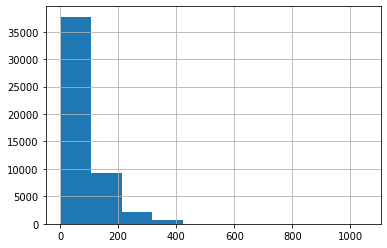

In [ ]:
df['len']= df['review'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['len']),min(df['len']),df['len'].mean()))
df['len'].hist()

In [ ]:
text= ' '.join(t for t in df['review'])
words_list= text.split()
word_freq= dict()
for word in set(words_list):
  word_freq[word] = 0
for word in words_list:
  word_freq[word] += 1   
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])
df_word['word_len']= df_word['word'].map(lambda x: len(x))
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word.head()

,word,count,word_len
0,one,53597,3
1,see,40476,3
2,like,40359,4
3,make,37263,4
4,good,33828,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


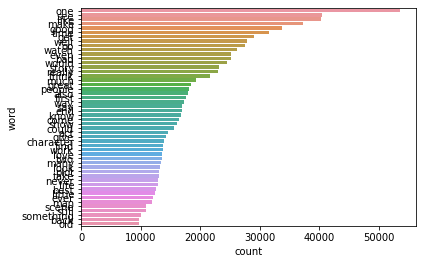

In [ ]:
df_top= df_word.head(50)
sns.barplot(df_top['count'],df_top['word'])

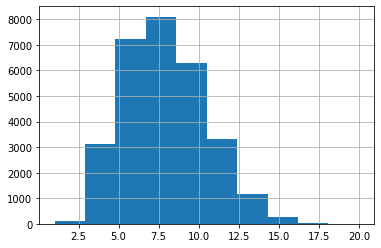

In [ ]:
df_word['word_len'].hist()

In [ ]:
df_word[df_word['word_len']==max(df_word['word_len'])]


,word,count,word_len
12208,uncharacteristically,13,20
23907,institutionalization,1,20


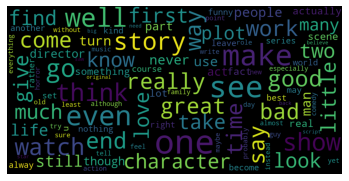

In [ ]:
wordcloud = WordCloud(background_color='black',max_words=100 ,max_font_size=40 ,scale=3,random_state=1).generate(text)
plt.axis("off")
plt.imshow(wordcloud)

In [ ]:
df.to_csv("IMDB_updated_Dataset.csv")